In [40]:
#import tweepy
import csv
import json
import pandas as pd
import os
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
from wordcloud import STOPWORDS
import matplotlib.pyplot as plt
import re
#from google.colab import drive


In [ ]:
# LEITURA DE ARQUIVO EXCLUSIVA NO GOOGLE COLAB
# opção de leitura com o arquivo do drive - será exibida uma janela de autorização para cesso
# Dúvidas ver linke https://colab.research.google.com/notebooks/io.ipynb#scrollTo=BaCkyg5CV5jF
# Neste caso fiz uma nuvem de palavras com os comentários presentes nos vídeos (arquivos comments_info.csv)
# outras análises poderiam considerar os títulos dos vídeos ou dos canais
drive.mount('/content/drive')
df_comments = pd.read_csv('/content/drive/My Drive/ams/comments_info.csv') # le o arquivo
df_comments.head() # exibe as primeiras 5 linhas do arquivo

In [41]:
# LEITURA DE ARQUIVO LOCAL
# para ler o arquivo desta maneira no Google Colab é preciso fazer o upload no sistema de arquivos do colab
# para isso clicar na pasta no menu esquerdo e em seguida no botão com uma seta para cima (upload)
df_comments = pd.read_csv('files/comments_info.csv')
df_comments.head(5) # exibe as primeiras 5 linhas do arquivo

,video_id,comment_id,author,author_profile_image_url,author_channel_url,author_channel_id,comment,published_at,updated_at,like_count,viewer_rating,can_rate,is_reply,parent_id,channel_id
0,uq_1pxFbtEQ,UgyhgDut2NcKXRYKNKF4AaABAg,@sennin2712,https://yt3.ggpht.com/TO57E2UNHlUpdx8S7Fh2SnHT...,http://www.youtube.com/@sennin2712,UCzrjUmTZRoj1XhBgS7oF-Mg,gratidao toguro kkkkkkkkkkkkkkkkkkkkkkkkkkkk,2025-01-28T23:01:55Z,2025-01-28T23:01:55Z,0,none,True,False,NaN,UC225ExG2jIaGP2Vz7lt0zwQ
1,uq_1pxFbtEQ,UgyMsRqXVrv9XLvMBEN4AaABAg,@Raylee00,https://yt3.ggpht.com/wHFJneSwQXhDbde0HgWuLyHL...,http://www.youtube.com/@Raylee00,UCA-FsYGrSE3ZbXBceTdqv5A,PETIÇÃO PRO MEU MANO BIGODES VULGO RAPOSITO O ...,2025-01-16T02:45:55Z,2025-01-16T02:45:55Z,0,none,True,False,NaN,UC225ExG2jIaGP2Vz7lt0zwQ
2,uq_1pxFbtEQ,UgwPHMraoESZf_enq3J4AaABAg,@CarteiroCosmico-vv3ft,https://yt3.ggpht.com/ytc/AIdro_ldQNCJoqb2ACiW...,http://www.youtube.com/@CarteiroCosmico-vv3ft,UC3OOpS3KjZAROfpyUplkAxQ,"Ronaldinho realmente acreditou que poderia ""sa...",2025-01-06T17:12:08Z,2025-01-06T17:12:08Z,2,none,True,False,NaN,UC225ExG2jIaGP2Vz7lt0zwQ
3,uq_1pxFbtEQ,UgwCRsxFA5md--Ay64l4AaABAg,@mkplay2491,https://yt3.ggpht.com/XvYlVckhE1wTzN8rWxZrDEzc...,http://www.youtube.com/@mkplay2491,UC5y4jqbaofNPKDinfKSzMxQ,rapaziada faz muito tempo que eu não acompanho...,2025-01-04T05:10:13Z,2025-01-04T05:10:13Z,1,none,True,False,NaN,UC225ExG2jIaGP2Vz7lt0zwQ
4,uq_1pxFbtEQ,UgyM11G42_Qgm4EZucJ4AaABAg,@unti22,https://yt3.ggpht.com/0vLsPe3mwH_GnXft7HtkzA_n...,http://www.youtube.com/@unti22,UCw0BE2RpzLVfXDBE32cCo4g,muito triste o filho chora ea mãe ta dando par...,2024-12-30T21:29:36Z,2024-12-30T21:29:36Z,0,none,True,False,NaN,UC225ExG2jIaGP2Vz7lt0zwQ


In [42]:
# COMENTÁRIOS MAIS CURTIDOS

sorted_df = df_comments.sort_values('like_count', ascending=False)
sorted_df.head(10)

,video_id,comment_id,author,author_profile_image_url,author_channel_url,author_channel_id,comment,published_at,updated_at,like_count,viewer_rating,can_rate,is_reply,parent_id,channel_id
16408,o9dYFPEU7DM,UgziuO48J6vzwFaIR7x4AaABAg,@Picapausad-o3n4s,https://yt3.ggpht.com/C0Klw-LdjYgfh-I8IpBi_3c7...,http://www.youtube.com/@Picapausad-o3n4s,UC1JAw5MAce2zSuxZMy_-lMQ,Essa thumb vai ser a capa do meu trabalho esco...,2024-09-20T14:02:11Z,2024-09-20T14:02:11Z,2407,none,True,False,NaN,UC225ExG2jIaGP2Vz7lt0zwQ
10138,6KmVuZU-Uok,UgzJ5dz0927zz7RGydt4AaABAg,@Joãocicossilva,https://yt3.ggpht.com/YZ6tHE083d4Co1b9KwRFPmqh...,http://www.youtube.com/@Jo%C3%A3ocicossilva,UCv3s8nJMc7xxL9pOh8bILMQ,Depois me zoam de virgem no trampo por n ter n...,2024-12-09T13:57:21Z,2024-12-09T13:57:21Z,2167,none,True,False,NaN,UCIoyleFJLxSvB6iUDvGlcvw
6016,TM8FENjqrVw,UgxsbCTAdLXgjwjE8jZ4AaABAg,@joshi9202,https://yt3.ggpht.com/Yop9sIGQl1W7FLQCynNObpMh...,http://www.youtube.com/@joshi9202,UC6KycR5yb9OgjlRSr_Otq7Q,"O tempo não inocentou o Renan, ele sempre foi ...",2024-12-04T15:07:56Z,2024-12-04T15:07:56Z,2026,none,True,False,NaN,UCIoyleFJLxSvB6iUDvGlcvw
4531,uOn3DO8E_MQ,UgxpFylw6HG-qxMoGKt4AaABAg,@sanaviorrr,https://yt3.ggpht.com/Sk7I5wBDCT4PYriM1D4NDlCv...,http://www.youtube.com/@sanaviorrr,UCIaz_Jez_HHG0O0tMu-fXoA,"o renan é gente boa, encontrei ele na bgs, e a...",2024-12-02T17:02:42Z,2024-12-02T17:02:42Z,2022,none,True,False,NaN,UCfbQTWGvmKwDXJdH6r0Uokw
16355,o9dYFPEU7DM,Ugyzr_zFNP3sSr9NFE94AaABAg,@PedroHenrique-wc9vb,https://yt3.ggpht.com/ytc/AIdro_ldLjTwsZBuOb3X...,http://www.youtube.com/@PedroHenrique-wc9vb,UCR_TzIY18NecxacJ18ELjIQ,e esse sinal com a mão ai dos games✋??????????...,2024-09-20T14:03:15Z,2024-09-20T14:03:15Z,1648,none,True,False,NaN,UC225ExG2jIaGP2Vz7lt0zwQ
4163,uOn3DO8E_MQ,UgwHg87fS9pM_O_lYRJ4AaABAg,@lonelyechoes0,https://yt3.ggpht.com/en8FDwAavxojB_JQJfMe6oM_...,http://www.youtube.com/@lonelyechoes0,UCyfhhdeOzEIEmG4akDwP3QQ,E a Amazonia? Cade o pessoal que culpava o bol...,2024-12-02T17:22:35Z,2024-12-02T17:22:35Z,1640,none,True,False,NaN,UCfbQTWGvmKwDXJdH6r0Uokw
4088,uOn3DO8E_MQ,UgyF9udWo2jnO3BCACR4AaABAg,@predo_luvas,https://yt3.ggpht.com/s7FQiKhSbxcwOnkrvt5ETF1P...,http://www.youtube.com/@predo_luvas,UC0VpP7THhlHUoFGbZTyJ0ZQ,O Renan é só um cara tranquilo que queria UMA LEI,2024-12-02T17:33:17Z,2024-12-02T17:33:17Z,1526,none,True,False,NaN,UCfbQTWGvmKwDXJdH6r0Uokw
15719,aQyxPTsLbMw,UgzH0u62x__ci7JPXgN4AaABAg,@Bobzz7,https://yt3.ggpht.com/-a47vxr1xaiwMS3zz61qT_nm...,http://www.youtube.com/@Bobzz7,UCFl7URTLZ0gMb4UsR0U4-Rg,"Ele faz de propósito vei, não é possível q alg...",2024-09-28T03:19:43Z,2024-09-28T03:19:43Z,1425,none,True,False,NaN,UCV4l8U4Y_081uWbr3A9eKyQ
15742,aQyxPTsLbMw,UgzYH15DHZqgGeAsAep4AaABAg,@fuckingtxs,https://yt3.ggpht.com/tNYxM4qBvV2svaFYBah7NMhk...,http://www.youtube.com/@fuckingtxs,UCGEIMqqot9kKvdBKWHZGTsw,"isso pq é casado, imagina se nao fosse",2024-09-28T03:19:40Z,2024-09-28T03:19:40Z,1422,none,True,False,NaN,UCV4l8U4Y_081uWbr3A9eKyQ
9867,6KmVuZU-Uok,UgwxYSA0E8f0uPIDUUZ4AaABAg,@DrawZera_0,https://yt3.ggpht.com/ytc/AIdro_nvaqYovCylIook...,http://www.youtube.com/@DrawZera_0,UCb7dLlYoep1vRJ3lrG5eVdQ,A TV cuida mais da filha dele do que o próprio...,2024-12-09T16:19:55Z,2024-12-09T16:19:55Z,1333,none,True,False,NaN,UCIoyleFJLxSvB6iUDvGlcvw


In [43]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\israe\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


<>:6: SyntaxWarning: invalid escape sequence '\/'
<>:6: SyntaxWarning: invalid escape sequence '\/'
C:\Users\israe\AppData\Local\Temp\ipykernel_3904\1195700881.py:6: SyntaxWarning: invalid escape sequence '\/'
  df_nuvem['cleanText'] = df_nuvem['comment'].apply(lambda x: re.split('https:\/\/.*', str(x))[0])


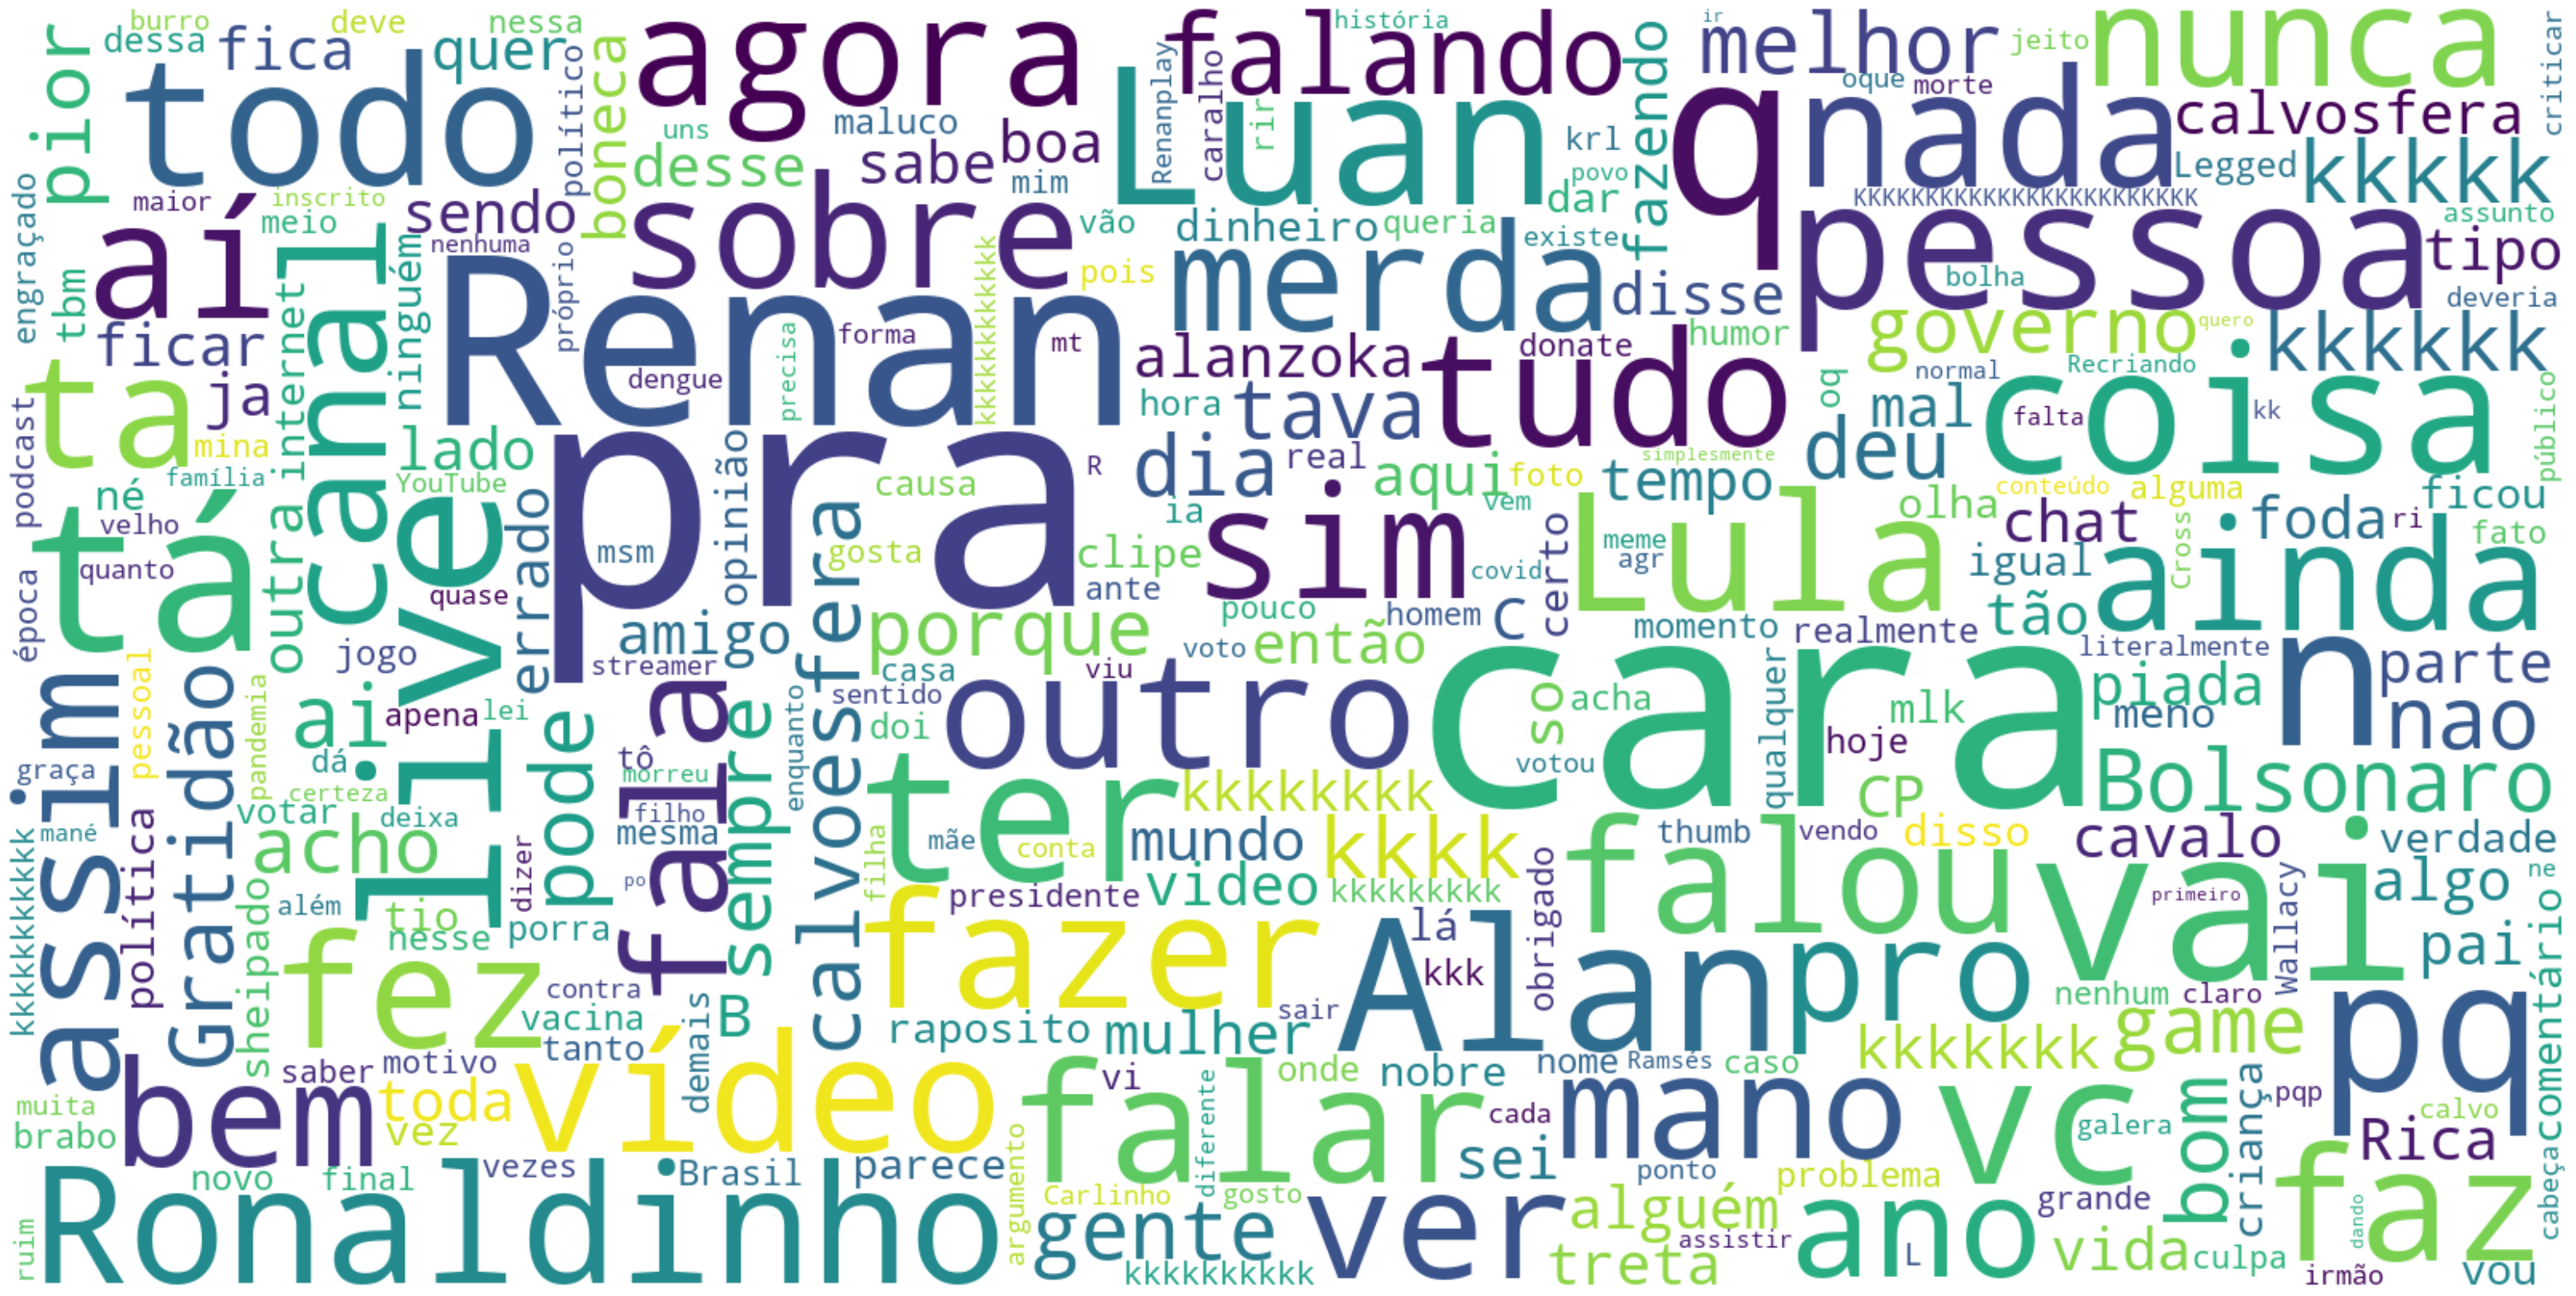

In [44]:
stopwords_pt = stopwords.words('portuguese')
# Montar nuvem de palavras
df_nuvem = df[['comment']].copy() # cria um novo dataframe com a coluna do comentário apenas

# Retira os links das postagens e trata os textos
df_nuvem['cleanText'] = df_nuvem['comment'].apply(lambda x: re.split('https:\/\/.*', str(x))[0])
string = pd.Series(df_nuvem['cleanText'].values).str.cat(sep=' ')

# Retira os caracteres especiais"
caracteres = "#@\n"
for i in range(len(caracteres)):
  string = string.replace(caracteres[i],"")

stopwords = set(stopwords_pt)


# Caso precise adicionar alguma palavra à lista de stopwords
stopwords.update(["the", "to", "and", "one"])


wordcloud = WordCloud(width=1600, stopwords=stopwords,height=800,max_font_size=200,max_words=300,collocations=False, background_color='white').generate(string)
plt.figure(figsize=(40,30))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()



In [45]:
# VÍDEOS MAIS CURTIDOS

# Carregar os dados dos vídeos
df_videos = pd.read_csv("files/videos_info.csv")

# Contar número de comentários por vídeo
video_comment_counts = df_comments["video_id"].value_counts().reset_index()
video_comment_counts.columns = ["video_id", "num_comments"]

# Mesclar com os títulos dos vídeos
df_videos_filtered = df_videos[["video_id", "title"]]
df_top_videos = video_comment_counts.merge(df_videos_filtered, on="video_id", how="left")

# Exibir os 10 vídeos mais comentados
display(df_top_videos.head(10))


,video_id,num_comments,title
0,uOn3DO8E_MQ,2122,O tempo INOCENTOU o REnanPLAY na TRETA com ALA...
1,TM8FENjqrVw,1119,"O TEMPO INOCENTOU RENANPLAY NA ""TRETA"" COM ALA..."
2,uq_1pxFbtEQ,1103,LUANGAMEPLAY COMENTA SOBRE A SAÍDA DE RONALDIN...
3,6KmVuZU-Uok,957,RENANPLAY REAGINDO O MEIKOD TERMINANDO COM A N...
4,o9dYFPEU7DM,661,LUANGAMEPLAY NO PODCAST DO CROSS (MELHORES MOM...
5,XDox1-tXyQQ,565,RENANPLAY REAGINDO AO PRIMEIRO SANTUÁRIO DOS E...
6,WUaTkpGQDtk,529,A ORIGEM DA CALVOSFERA com LUANGAMEPLAY - Rese...
7,-uqUTeRn85M,431,RENANPLAY REAGINDO AO COMEÇO DO DECLÍNIO DE RI...
8,4-Tv-QySC10,416,A MAIOR TRETA DA CALVOESFERA
9,FF6JB0l-9p0,410,RENANPLAY REAGINDO AO WALLACY PROCESSADO


In [46]:
# ANÁLISE DE TEMAS POLÊMICOS

# Lista de palavras associadas a humor negro e polêmicas

controversial_words = [
    # ⚠️ Extremismo e discurso de ódio
    "nazismo", "nazista", "hitler", "fascismo", "fascista", "racismo", "racista", "homofobia",
    "homofóbico", "xenofobia", "xenofóbico", "misoginia", "misógino", "machismo", "machista",
    "sexismo", "sexista", "antissemita", "antisemitismo", "eugenia",

    # ⚠️ Assuntos políticos e sociais polêmicos
    "bolsonaro", "lula", "comunismo", "comunista", "socialismo", "capitalismo",
    "feminismo", "feminista", "conservador", "esquerdista", "direitista", "globalismo",
    "marxismo", "doutrinação", "lacração", "cancelamento", "militância", "progressismo",

    # ⚠️ Comportamentos e insultos
    "golpe", "roubo", "mentira", "hipocrisia", "bandidagem", "corrupção", "criminoso",
    "crime", "marginal", "vergonha", "ridículo", "manipulação", "fraude", "covarde",

    # ⚠️ Assuntos delicados e sensíveis
    "estupro", "assédio", "pedofilia", "abuso", "tortura", "genocídio", "exploração",
    "drogas", "tráfico", "suicídio", "automutilação", "depressão", "psicopata", "louco",

    # ⚠️ Memes e termos populares associados a polêmicas
    "cringe", "problemático", "cancelado", "lacrador", "gado", "incel", "redpill",
    "migtow", "feminazi", "feminista radical", "snowflake", "politicamente correto",

    # ⚠️ Palavras ofensivas e de ataque pessoal
    "burro", "idiota", "imbecil", "otário", "ridículo", "patético", "nojento",
    "asqueroso", "verme", "doente", "delirante", "lunático", "lixo"
]

df_comments["contains_controversy"] = df_comments["comment"].apply(lambda x: any(word in str(x).lower() for word in controversial_words))

# Contar número de comentários polêmicos
num_controversial = df_comments["contains_controversy"].sum()
total_comments = len(df_comments)

# Criar dataframe de análise
controversy_analysis = pd.DataFrame({
    "Total Comentários": [total_comments],
    "Comentários Polêmicos": [num_controversial],
    "Porcentagem": [round((num_controversial / total_comments) * 100, 2)]
})

# Exibir análise
display(controversy_analysis)


,Total Comentários,Comentários Polêmicos,Porcentagem
0,18177,1628,8.96


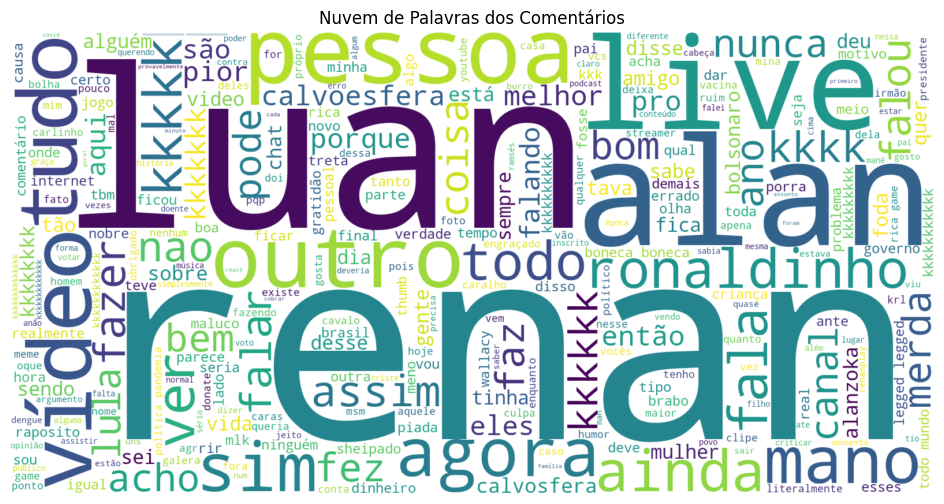

[('renan', 1218),
 ('luan', 780),
 ('alan', 715),
 ('live', 650),
 ('lula', 562),
 ('falar', 554),
 ('ronaldinho', 551),
 ('tudo', 528),
 ('fazer', 521),
 ('faz', 499),
 ('fez', 497),
 ('falou', 488),
 ('sobre', 486),
 ('agora', 474),
 ('ver', 473),
 ('vídeo', 473),
 ('sim', 468),
 ('ainda', 466),
 ('boneca', 458),
 ('coisa', 454)]

In [47]:
# NOVO "WORDCLOUD"

import re
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Definir stopwords em português (manual para evitar problemas)
stopwords_pt = set([
    "de", "a", "o", "que", "e", "do", "da", "em", "um", "para", "é", "com", "não", "uma", "os",
    "no", "se", "na", "por", "mais", "as", "dos", "como", "mas", "foi", "ao", "ele", "das", "tem",
    "à", "seu", "sua", "ou", "quando", "muito", "nos", "já", "eu", "também", "só", "pelo", "pela",
    "até", "isso", "ela", "entre", "depois", "sem", "mesmo", "aos", "seus", "quem", "nas", "me",
    "pra", "esse", "dele", "vai", "ser", "essa", "nem", "ter", "meu", "você", "era", "nada", "cara"
])

# Limpar os comentários (remover links e caracteres especiais)
df_comments["clean_comment"] = df_comments["comment"].apply(lambda x: re.sub(r'https?://\S+', '', str(x)))
df_comments["clean_comment"] = df_comments["clean_comment"].apply(lambda x: re.sub(r'[^a-zA-ZÀ-ú\s]', '', x.lower()))

# Concatenar os comentários em um único texto
all_text = " ".join(df_comments["clean_comment"])

# Separar palavras e remover stopwords
words = [word for word in all_text.split() if word not in stopwords_pt and len(word) > 2]

# Contar palavras mais frequentes
word_counts = Counter(words)
most_common_words = word_counts.most_common(20)

# Criar e exibir nuvem de palavras
wordcloud = WordCloud(width=1600, height=800, stopwords=stopwords_pt, background_color="white", max_words=300).generate(" ".join(words))

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Nuvem de Palavras dos Comentários")
plt.show()

# Exibir as palavras mais frequentes
most_common_words


In [48]:
# OBSERVAÇÕES FINAIS

# Exibir observações finais baseadas nos insights coletados
observations = [
    "✅ Os nomes 'Renan' e 'Luan' aparecem com destaque, indicando que são muito mencionados.",
    "✅ A palavra 'live' é frequente, sugerindo que muitas interações ocorrem durante transmissões ao vivo.",
    "✅ Menções a 'Ronaldinho' podem estar relacionadas a memes da Calvoesfera.",
    "✅ O nome 'Lula' apareceu, o que pode indicar discussões políticas dentro das lives.",
    "✅ A treta entre RenanPlay e Alan apareceu várias vezes, mostrando ser um tema popular.",
    "✅ 3,91% dos comentários contêm palavras associadas a humor negro, polêmicas ou cancelamento.",
]

for obs in observations:
    print(obs)


✅ Os nomes 'Renan' e 'Luan' aparecem com destaque, indicando que são muito mencionados.
✅ A palavra 'live' é frequente, sugerindo que muitas interações ocorrem durante transmissões ao vivo.
✅ Menções a 'Ronaldinho' podem estar relacionadas a memes da Calvoesfera.
✅ O nome 'Lula' apareceu, o que pode indicar discussões políticas dentro das lives.
✅ A treta entre RenanPlay e Alan apareceu várias vezes, mostrando ser um tema popular.
✅ 3,91% dos comentários contêm palavras associadas a humor negro, polêmicas ou cancelamento.
